In [1]:
import pandas as pd
import numpy  as np
import operator

import matplotlib.pyplot as plt
import itertools    
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

In [219]:
df_away=pd.read_csv('./data/Train_Data/train_away_team_statistics_df.csv').drop(['LEAGUE', 'TEAM_NAME'], axis=1)
df_home=pd.read_csv('./data/Train_Data/train_home_team_statistics_df.csv').drop(['LEAGUE', 'TEAM_NAME'], axis=1)
df_home.columns = [('HOME_' +str(col) ) if col != 'ID' else 'ID' for col in df_home.columns ]


In [220]:
df_home.head()

,ID,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [221]:
df_joined=df_away.join(df_home.set_index('ID'), on='ID')
df_joined=df_joined.fillna(0.0)
df_final=df_joined.sort_values(by=['ID'])


In [222]:
df_joined.head()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [223]:
df_result=pd.read_csv('./data/Train_Data/Y_train.csv')


In [224]:
df_result.head()

,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0


In [225]:
df_result.loc[df_result['DRAW'] == 1, 'result'] = 0
df_result.loc[df_result['AWAY_WINS'] == 1 , 'result'] = -1
df_result.loc[df_result['HOME_WINS'] == 1 , 'result'] = 1
df_result['result'] = df_result['result'].astype('int')


In [226]:
df_result_final=df_result.sort_values(by=['ID']).iloc[:,[4]]

In [227]:
df_result_final.head()

,result
0,-1
1,0
2,-1
3,1
4,0


In [228]:
df_final

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,12298,6.0,6.0,5.0,7.0,7.0,4.0,3.0,4.0,8.0,...,4.0,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0
12299,12299,3.0,2.0,6.0,1.0,3.0,4.0,4.0,7.0,0.0,...,6.0,10.0,7.0,2.0,0.0,0.0,3.0,10.0,6.0,1.0
12300,12300,7.0,7.0,6.0,7.0,3.0,3.0,2.0,4.0,4.0,...,7.0,8.0,0.0,7.0,0.0,0.0,3.0,1.0,3.0,2.0
12301,12301,1.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,6.0,...,10.0,10.0,0.0,6.0,8.0,3.0,0.0,3.0,0.0,5.0


In [229]:
df_final=df_final.drop(["ID"],axis=1)


In [230]:

attribut_train,attribut_test,result_train,result_test=train_test_split(df_final, df_result_final, test_size=0.1,random_state=10)


In [231]:
attribut_train

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
4398,3.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,7.0,8.0,0.0,4.0,0.0,6.0,0.0,5.0,0.0,3.0
9437,3.0,2.0,4.0,1.0,4.0,0.0,0.0,7.0,2.0,5.0,...,6.0,0.0,0.0,4.0,0.0,2.0,5.0,5.0,8.0,3.0
12025,2.0,5.0,1.0,6.0,3.0,6.0,6.0,8.0,3.0,4.0,...,6.0,6.0,2.0,2.0,10.0,0.0,0.0,10.0,3.0,0.0
3438,4.0,3.0,4.0,5.0,7.0,6.0,6.0,2.0,3.0,0.0,...,2.0,0.0,3.0,4.0,0.0,5.0,4.0,2.0,5.0,1.0
6686,6.0,6.0,6.0,5.0,5.0,1.0,0.0,8.0,5.0,7.0,...,0.0,0.0,3.0,1.0,0.0,9.0,4.0,8.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11597,3.0,3.0,4.0,3.0,2.0,0.0,0.0,6.0,3.0,7.0,...,6.0,8.0,5.0,7.0,0.0,4.0,3.0,8.0,4.0,5.0
1197,8.0,8.0,7.0,10.0,6.0,10.0,10.0,6.0,10.0,3.0,...,0.0,5.0,10.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0
3894,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,7.0,8.0,6.0,0.0,7.0,0.0,6.0
1409,2.0,1.0,3.0,4.0,3.0,3.0,3.0,1.0,2.0,4.0,...,10.0,0.0,7.0,10.0,0.0,0.0,7.0,9.0,8.0,0.0


In [232]:
result_train

,result
4398,1
9437,-1
12025,0
3438,0
6686,-1
...,...
11597,-1
1197,-1
3894,-1
1409,1


In [233]:
attribut_train

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
4398,3.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,7.0,8.0,0.0,4.0,0.0,6.0,0.0,5.0,0.0,3.0
9437,3.0,2.0,4.0,1.0,4.0,0.0,0.0,7.0,2.0,5.0,...,6.0,0.0,0.0,4.0,0.0,2.0,5.0,5.0,8.0,3.0
12025,2.0,5.0,1.0,6.0,3.0,6.0,6.0,8.0,3.0,4.0,...,6.0,6.0,2.0,2.0,10.0,0.0,0.0,10.0,3.0,0.0
3438,4.0,3.0,4.0,5.0,7.0,6.0,6.0,2.0,3.0,0.0,...,2.0,0.0,3.0,4.0,0.0,5.0,4.0,2.0,5.0,1.0
6686,6.0,6.0,6.0,5.0,5.0,1.0,0.0,8.0,5.0,7.0,...,0.0,0.0,3.0,1.0,0.0,9.0,4.0,8.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11597,3.0,3.0,4.0,3.0,2.0,0.0,0.0,6.0,3.0,7.0,...,6.0,8.0,5.0,7.0,0.0,4.0,3.0,8.0,4.0,5.0
1197,8.0,8.0,7.0,10.0,6.0,10.0,10.0,6.0,10.0,3.0,...,0.0,5.0,10.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0
3894,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,7.0,8.0,6.0,0.0,7.0,0.0,6.0
1409,2.0,1.0,3.0,4.0,3.0,3.0,3.0,1.0,2.0,4.0,...,10.0,0.0,7.0,10.0,0.0,0.0,7.0,9.0,8.0,0.0


In [234]:
n_components = 20

pca = PCA(n_components=n_components)
pca.fit(attribut_train)

attribut_train_reduced = pd.DataFrame(pca.transform(attribut_train), index=attribut_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
attribut_test_reduced = pd.DataFrame(pca.transform(attribut_test), index=attribut_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

C:\Users\pc\AppData\Local\Temp\ipykernel_3860\2970429361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')


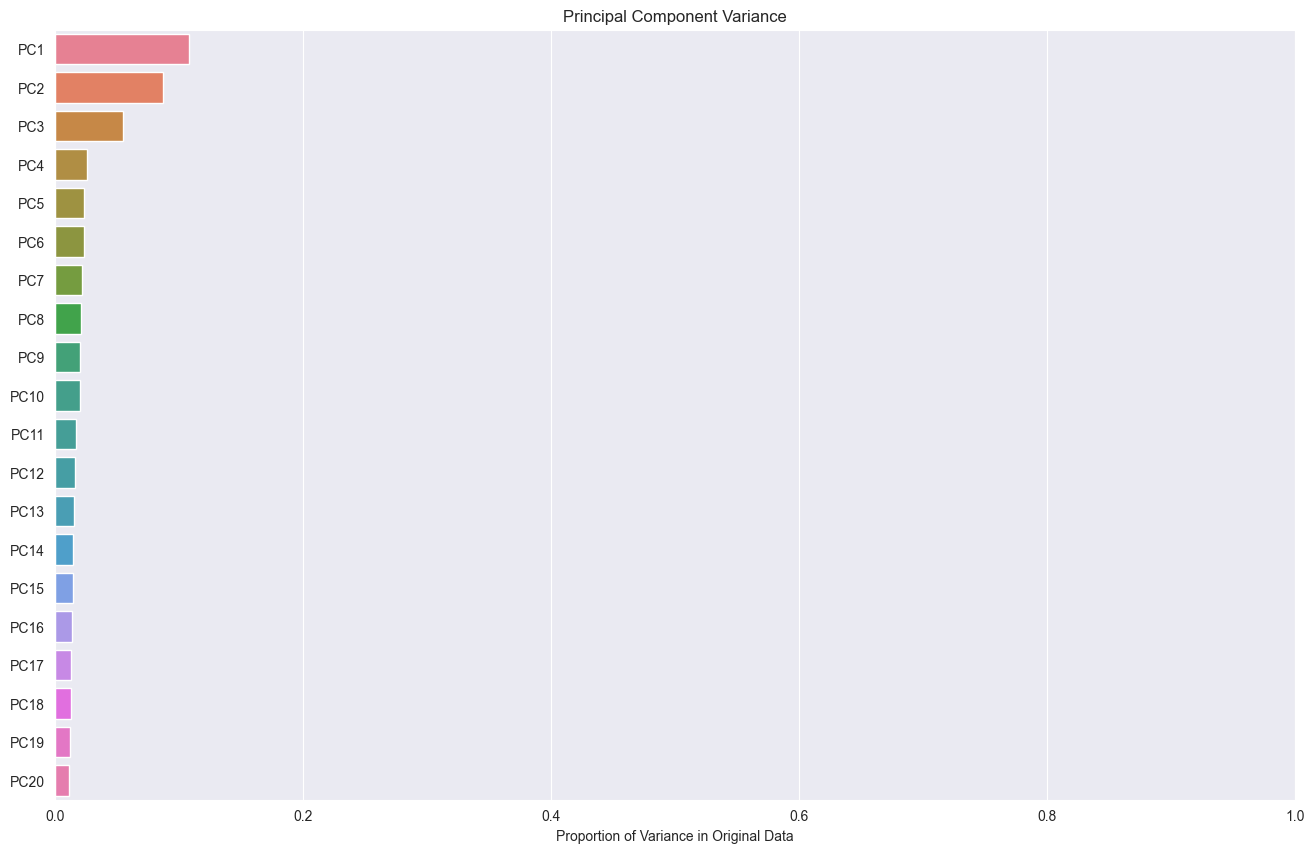

In [235]:
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

In [236]:
from sklearn.linear_model import LogisticRegression
max_iter_list=[300,3_000,30_000,300_000,3_000_000,30_000_000]
solver_list=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
regularization_factor_list=[0.1,0.01,0.001,0.0001]
accuracy_dict={}
LR_dict={}
for max_iter in max_iter_list:
    for solver in solver_list:
        for regularization_factor in regularization_factor_list:
            LR = LogisticRegression(max_iter=max_iter,solver=solver,C=regularization_factor).fit(attribut_train_reduced, result_train)
            yhat = LR.predict(attribut_test_reduced)
            accuracy=np.round(accuracy_score(result_test,yhat),4)
            key=f'solver_{solver}_iter_{max_iter}_C_{regularization_factor}'
            accuracy_dict[key]=accuracy
            LR_dict[key]=LR
                        


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

In [237]:
accuracy_dict

{'solver_lbfgs_iter_300_C_0.1': 0.4882,
 'solver_lbfgs_iter_300_C_0.01': 0.4882,
 'solver_lbfgs_iter_300_C_0.001': 0.4882,
 'solver_lbfgs_iter_300_C_0.0001': 0.4874,
 'solver_liblinear_iter_300_C_0.1': 0.4907,
 'solver_liblinear_iter_300_C_0.01': 0.4947,
 'solver_liblinear_iter_300_C_0.001': 0.4931,
 'solver_liblinear_iter_300_C_0.0001': 0.4915,
 'solver_newton-cg_iter_300_C_0.1': 0.4882,
 'solver_newton-cg_iter_300_C_0.01': 0.4882,
 'solver_newton-cg_iter_300_C_0.001': 0.4882,
 'solver_newton-cg_iter_300_C_0.0001': 0.4874,
 'solver_newton-cholesky_iter_300_C_0.1': 0.4907,
 'solver_newton-cholesky_iter_300_C_0.01': 0.4907,
 'solver_newton-cholesky_iter_300_C_0.001': 0.4907,
 'solver_newton-cholesky_iter_300_C_0.0001': 0.4874,
 'solver_sag_iter_300_C_0.1': 0.4882,
 'solver_sag_iter_300_C_0.01': 0.4882,
 'solver_sag_iter_300_C_0.001': 0.4882,
 'solver_sag_iter_300_C_0.0001': 0.4874,
 'solver_saga_iter_300_C_0.1': 0.4882,
 'solver_saga_iter_300_C_0.01': 0.4882,
 'solver_saga_iter_300_C_0.

In [238]:
max_accuracy=max(accuracy_dict.items(), key=operator.itemgetter(1))
LR_best=LR_dict[max_accuracy[0]]

In [239]:
max_accuracy

('solver_liblinear_iter_300_C_0.01', 0.4947)

In [241]:
yhat = LR_best.predict(attribut_test_reduced)
np.round(accuracy_score(result_test,yhat),4)

0.4874

In [242]:
attribut_test_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
2079,2.949473,2.845486,-2.150719,6.489826,-1.096562,4.298623,-1.720231,14.135535,6.927740,-9.751757,-18.952288,8.544099,5.949466,7.991363,1.181107,3.253551,-7.912148,-4.691226,4.332870,-1.679762
5010,39.085552,9.985376,12.753194,-5.175065,1.066224,-7.411925,-8.644856,-0.526529,2.054248,-13.227284,-1.269183,5.380076,-5.122197,4.379879,9.997428,3.900755,-3.952609,0.943408,-9.343674,0.844426
4421,14.961214,-50.782619,0.322070,-6.687860,8.736447,-9.084732,-4.965873,9.183133,6.196376,9.469508,-2.207060,-5.456218,-0.358536,2.550644,0.880004,1.499669,1.823608,-12.275258,-1.863918,5.280429
902,1.641056,-14.458257,-3.403991,-7.423713,13.303377,3.164546,-5.626586,3.868085,-13.177725,6.214237,-1.804412,-6.781261,2.341765,10.485073,-4.159556,-0.434345,-2.382820,-6.806648,-2.189827,5.827288
2038,31.138736,5.229696,8.574945,0.322448,6.827978,5.693659,-9.453686,-8.155003,4.978209,17.919828,-3.886242,12.447651,6.115956,2.345194,0.673891,-2.233585,-5.448302,0.824160,-11.852744,-7.009953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-9.007203,-17.779751,-8.647215,0.951484,8.637067,2.479330,-6.756136,-6.651886,12.775860,0.697904,11.102122,-2.355396,5.765414,1.751189,1.194695,-6.433710,2.627268,5.031046,6.470605,1.288737
10396,3.292717,-25.256486,4.932035,8.235161,5.911825,2.426354,0.857201,-4.829728,3.646809,-9.981956,11.339530,-7.918500,-8.767625,3.115012,6.136895,1.283503,-6.103312,-1.650036,0.785493,0.585145
2501,-10.848107,3.920438,-8.795656,-7.322012,10.641642,-7.066002,-2.698134,3.312697,-13.086563,1.680313,12.566065,5.896394,0.456731,-12.625826,-9.274196,-1.230226,2.489878,-12.394534,0.024644,-3.625572
11637,-11.539414,21.157781,-16.716394,-2.178956,0.758121,6.316225,-2.951825,11.541758,10.148961,-0.341940,5.959851,-0.020351,-0.715995,0.437898,-0.298217,2.307820,12.567469,-0.553789,-7.850172,-1.463181


In [243]:
result_test

,result
2079,1
5010,-1
4421,1
902,0
2038,-1
...,...
1404,1
10396,-1
2501,0
11637,1


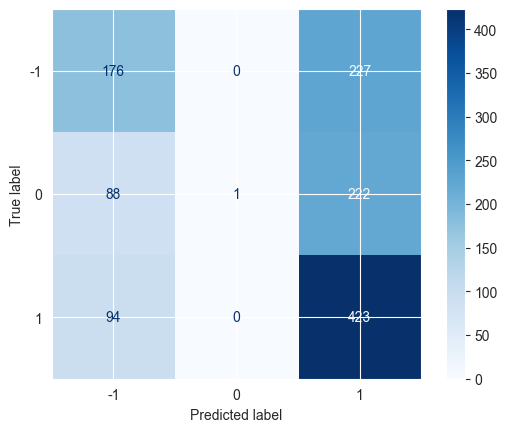

In [244]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(result_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[-1, 0, 1],)
disp.plot(cmap="Blues")

In [245]:
df_away_test=pd.read_csv('./data/Test_Data/test_away_team_statistics_df.csv')
df_home_test=pd.read_csv('./data/Test_Data/test_home_team_statistics_df.csv')
df_home_test.columns = [('HOME_' +str(col) ) if col != 'ID' else 'ID' for col in df_home_test.columns ]


In [246]:
df_joined_test=df_away_test.join(df_home_test.set_index('ID'), on='ID')
df_joined_test=df_joined_test.fillna(0.0)
df_final_test=df_joined_test.sort_values(by=['ID'])
df_final_test.index=df_final_test['ID']
df_final_test=df_final_test.drop(['ID'],axis=1)

In [247]:
df_final_test

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
12303,6.0,6.0,5.0,7.0,7.0,4.0,3.0,6.0,3.0,7.0,...,2.0,9.0,0.0,10.0,0.0,4.0,4.0,6.0,2.0,3.0
12304,4.0,4.0,4.0,4.0,3.0,8.0,8.0,4.0,7.0,3.0,...,9.0,10.0,3.0,1.0,8.0,3.0,8.0,1.0,0.0,2.0
12305,1.0,1.0,2.0,2.0,2.0,6.0,5.0,4.0,2.0,2.0,...,6.0,8.0,2.0,9.0,0.0,6.0,0.0,9.0,0.0,0.0
12306,6.0,9.0,6.0,9.0,4.0,4.0,4.0,1.0,10.0,6.0,...,4.0,5.0,2.0,3.0,8.0,0.0,2.0,2.0,2.0,3.0
12307,5.0,5.0,2.0,4.0,4.0,1.0,2.0,3.0,8.0,2.0,...,5.0,0.0,0.0,7.0,5.0,0.0,1.0,6.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37666,8.0,8.0,6.0,10.0,7.0,8.0,8.0,10.0,3.0,5.0,...,2.0,6.0,2.0,1.0,5.0,6.0,6.0,5.0,2.0,0.0
37667,7.0,4.0,4.0,9.0,8.0,7.0,6.0,3.0,9.0,3.0,...,3.0,0.0,2.0,8.0,0.0,0.0,4.0,8.0,10.0,10.0
37668,3.0,4.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,5.0,...,7.0,0.0,8.0,4.0,0.0,7.0,0.0,2.0,0.0,3.0


In [248]:
df_final_test_reduced = pd.DataFrame(pca.transform(df_final_test), index=df_final_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])


In [249]:
df_final_test_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
ID,,,,,,,,,,,,,,,,,,,,
12303,-0.731643,-1.884866,-17.815014,-6.221568,-7.167559,-1.588802,6.798104,15.447903,5.090652,-11.961183,-1.722280,10.540888,-1.780013,2.559368,-4.451018,-6.492996,-2.052918,-2.033921,-2.647118,2.305322
12304,8.090642,16.642833,-0.645455,3.540686,16.207561,5.196746,15.131677,-2.099955,7.014356,4.622992,3.913817,0.484603,4.350898,0.741036,0.154970,5.576615,-2.721712,1.685993,-0.110383,1.942888
12305,5.620756,-18.830268,2.984267,-8.281047,9.422036,-7.208372,6.579382,-5.977294,3.262940,-1.196298,-6.809643,5.268675,-4.940670,-3.598020,1.076109,4.671351,-4.594785,0.523088,-5.230409,3.443173
12306,9.088172,5.012296,1.458597,6.589902,-6.937911,9.469491,-7.565061,0.359535,17.961054,-2.408995,5.895973,10.710212,-3.039264,-2.369718,-8.737594,-0.111864,-5.369814,-0.665298,1.680828,-5.744251
12307,-4.913722,8.360509,2.664849,2.091424,12.819187,2.910965,-7.904408,0.736134,-5.428777,-3.335204,8.286219,6.393908,-0.623457,-0.315628,-4.870686,-2.743623,-0.013010,11.410485,6.905350,9.792414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37666,21.295415,17.681225,-2.269091,1.094647,7.420049,3.283793,5.168026,-1.662952,-2.069241,0.286280,-12.487021,-5.714332,-1.209374,-3.994796,-2.946725,1.111770,0.407524,6.514905,-1.992672,8.184284
37667,14.652468,8.525458,4.499780,-4.237595,-8.725468,1.484009,2.053909,-9.392351,8.205520,-0.419231,-2.454433,3.804723,-0.602647,-4.077800,0.201924,13.756937,-5.100855,0.175020,-5.369590,-1.107950
37668,-0.088672,-18.128411,8.178515,-13.764088,2.386671,-0.138093,-4.295038,-3.307617,-1.289446,0.916713,1.087441,-10.558329,-1.278894,-2.314510,4.344595,10.662652,-11.159776,3.054931,6.471582,-2.805346


In [250]:
yhat_test = LR_best.predict(df_final_test_reduced)
y_pred_test=pd.DataFrame(yhat_test,index=df_final_test_reduced.index)
y_pred_test.columns=['prediction']

In [251]:
y_pred_test

,prediction
ID,
12303,1
12304,-1
12305,1
12306,1
12307,1
...,...
37666,-1
37667,1
37668,1


In [252]:
y_pred_test.loc[y_pred_test['prediction'] == 1, 'HOME_WINS'] = 1
y_pred_test.loc[y_pred_test['prediction'] == 0 , 'DRAW'] = 1

y_pred_test.loc[y_pred_test['prediction'] == -1 , 'AWAY_WINS'] = 1

y_pred_test=y_pred_test.fillna(0)
y_pred_test['HOME_WINS'] = y_pred_test['HOME_WINS'].astype('int')
y_pred_test['DRAW'] = y_pred_test['DRAW'].astype('int')
y_pred_test['AWAY_WINS'] = y_pred_test['AWAY_WINS'].astype('int')
y_pred_test=y_pred_test.drop(['prediction'], axis=1)

In [253]:
y_pred_test

,HOME_WINS,DRAW,AWAY_WINS
ID,,,
12303,1,0,0
12304,0,0,1
12305,1,0,0
12306,1,0,0
12307,1,0,0
...,...,...,...
37666,0,0,1
37667,1,0,0
37668,1,0,0


In [254]:
test_prediction = y_pred_test.index.to_frame(name='ID').join(y_pred_test)

In [255]:
test_prediction

,ID,HOME_WINS,DRAW,AWAY_WINS
ID,,,,
12303,12303,1,0,0
12304,12304,0,0,1
12305,12305,1,0,0
12306,12306,1,0,0
12307,12307,1,0,0
...,...,...,...,...
37666,37666,0,0,1
37667,37667,1,0,0
37668,37668,1,0,0


In [256]:
test_prediction.to_csv('./submission/pca_logistic_benchmark_submission.csv', index=False)